In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import statsmodels.api as sm

# Data Preparation

## Load and backup data   

Load the diabetes dataset into a DataFrame and make a backup

In [2]:
diabetes = datasets.load_diabetes()
DiaB = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
DiaB["Target"] = diabetes.target
DiaB2 = DiaB.copy(deep=True)
DiaB.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


We have several standardized variables, which we will use to model the target variable.<br>
Because this data set doesn't include the standard deviations of the standardized variables, we cannot recreate the variables mathematically.
So we have to go and use these variables as they are.<br>
And in this data set, we will use the variables as if we were machines, so we will not use any prior knowledge about whether age or BMI or blood pressure affects the target variable. We don't know this, so we will act as if we have no prior knowledge at all about these variables and which variable is related to which variable.<br>
So we have a target variable, which we will pretend that we don't know what it is, and we have a set of variables, which we will use to predict the target variable as good as we are able.

# Correlation Matrix

## Create and visualize a correlation matrix

Visualization of the matrix and its' absolute values with use of <b>Seaborn heatmaps</b>

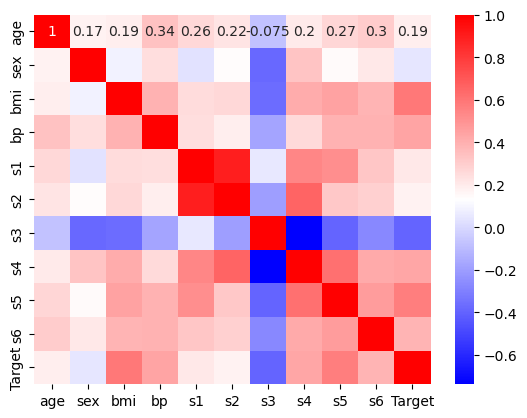

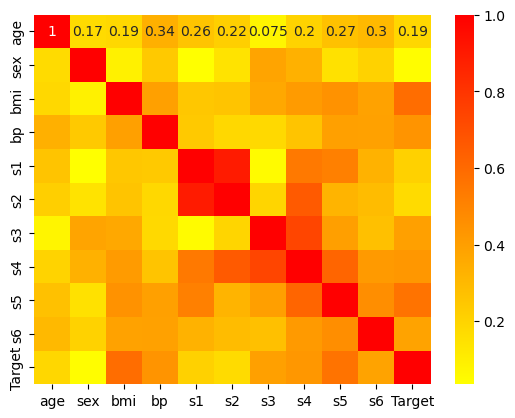

In [3]:
corMatrix = DiaB.corr()
sns.heatmap(corMatrix, annot=True, cmap=plt.cm.bwr)
plt.show()
sns.heatmap(abs(corMatrix), annot=True, cmap=plt.cm.autumn_r)
plt.show()

## Select the variables for model training

In [4]:
corTarget = abs(corMatrix["Target"])
corTarget

age       0.187889
sex       0.043062
bmi       0.586450
bp        0.441482
s1        0.212022
s2        0.174054
s3        0.394789
s4        0.430453
s5        0.565883
s6        0.382483
Target    1.000000
Name: Target, dtype: float64

In [5]:
type(corTarget)

pandas.core.series.Series

Select the variables having the correlation with the target variable higher than 0.4

In [6]:
relVars = corTarget[corTarget > 0.4]
relVars

bmi       0.586450
bp        0.441482
s4        0.430453
s5        0.565883
Target    1.000000
Name: Target, dtype: float64

In [7]:
type(relVars)

pandas.core.series.Series

In [8]:
relVars.sort_values(ascending=False, inplace=True)
relVars

Target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
Name: Target, dtype: float64

# Train the model

The selected variables are added to a **feature matrix** (*X*)

In [9]:
X = DiaB[["bmi", "s5", "bp", "s4"]]
X

,bmi,s5,bp,s4
0,0.061696,0.019907,0.021872,-0.002592
1,-0.051474,-0.068332,-0.026328,-0.039493
2,0.044451,0.002861,-0.005670,-0.002592
3,-0.011595,0.022688,-0.036656,0.034309
4,-0.036385,-0.031988,0.021872,-0.002592
...,...,...,...,...
437,0.019662,0.031193,0.059744,-0.002592
438,-0.015906,-0.018114,-0.067642,0.034309
439,-0.015906,-0.046883,0.017293,-0.011080
440,0.039062,0.044529,0.001215,0.026560


An **intercept** or **constant** is added to the Matrix

In [10]:
X.insert(0, "Const", 1)
X

,Const,bmi,s5,bp,s4
0,1,0.061696,0.019907,0.021872,-0.002592
1,1,-0.051474,-0.068332,-0.026328,-0.039493
2,1,0.044451,0.002861,-0.005670,-0.002592
3,1,-0.011595,0.022688,-0.036656,0.034309
4,1,-0.036385,-0.031988,0.021872,-0.002592
...,...,...,...,...,...
437,1,0.019662,0.031193,0.059744,-0.002592
438,1,-0.015906,-0.018114,-0.067642,0.034309
439,1,-0.015906,-0.046883,0.017293,-0.011080
440,1,0.039062,0.044529,0.001215,0.026560


A **Target** column is created

In [11]:
Y = DiaB["Target"]
Y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: Target, Length: 442, dtype: float64

A regression object will be fit to *Y* and *X*.<br>
A summary is added.

In [12]:
regr = sm.OLS(Y, X).fit()
print(regr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     101.4
Date:                Thu, 25 Sep 2025   Prob (F-statistic):           5.41e-61
Time:                        17:47:10   Log-Likelihood:                -2402.1
No. Observations:                 442   AIC:                             4814.
Df Residuals:                     437   BIC:                             4835.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Const        152.1335      2.653     57.344      0.0

From our summary output we can see that our regression model has a **weak explanatory power** (*R squared*) of **48.1**%.<br>
And a slightly weaker *R squared* adjusted value of 47.7%.<br>
And the interesting thing here is that the *Durbin-Watson* statistic detects **no autocorrelations in our residuals** with an **almost perfect value of 1.956**.<br>
Based on the *P|t|* statistic, all variables seem to have significant impact on the target (value < 0,05), except s4. Due to this, we will retrain the model excluding the s4 variable.

In [13]:
X = DiaB[["bmi", "s5", "bp"]]
X.insert(0, "Const", 1)
Y = DiaB["Target"]
regr = sm.OLS(Y, X).fit()
print(regr.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     134.8
Date:                Thu, 25 Sep 2025   Prob (F-statistic):           7.16e-62
Time:                        17:47:10   Log-Likelihood:                -2402.6
No. Observations:                 442   AIC:                             4813.
Df Residuals:                     438   BIC:                             4830.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Const        152.1335      2.653     57.342      0.0

The *R-squared* values are a bit disappointing but this is a very tough dataset model because it has **huge variations in the target variable**.<br>
So it is very hard to get good estimates or high accuracy and explanatory power in this dataset.

The overall conclusion is that **this model is significant and operable but that it has a very large residual distribution which creates a low explanatory power**.<br>
This is about as good as we can get with this type of model, this data and this way of manually building the model.<br>
And the level of effort we right now want to put into this model.

## Residual plots

### Statsmodels residual plots

In [14]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

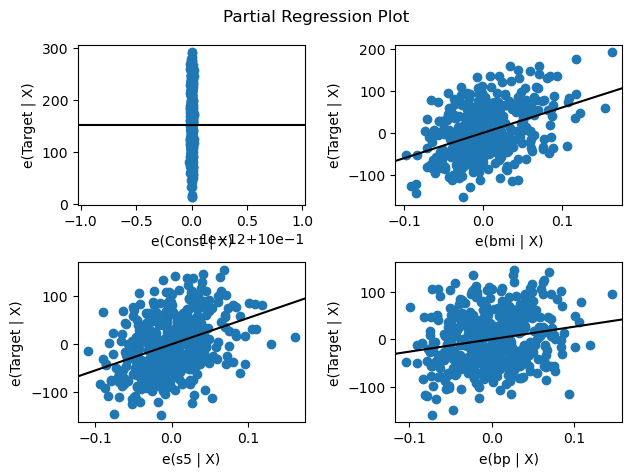

In [15]:
fig = sm.graphics.plot_partregress_grid(regr)
fig.tight_layout(pad=1.0)
plt.show()

The conclusion from this partial regression plot is that **we have a target distribution with large variations**, which creates a 48.1% explanatory power.<br>
These plots give no real evidence of any deviations from the assumptions in these regression models.<br>
It can be concluded from the plots that assumptions are fulfilled for our regression model.

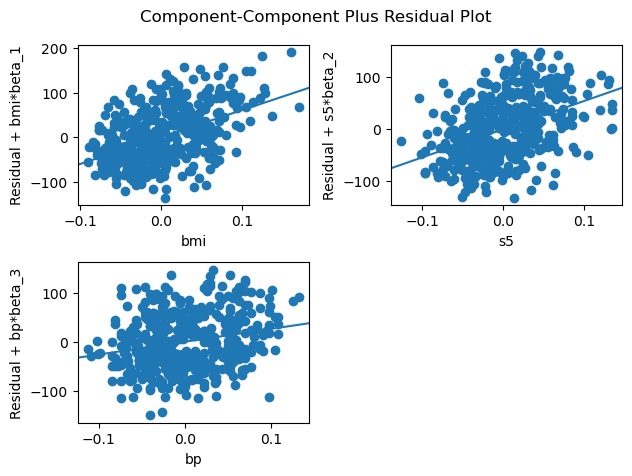

In [16]:
fig = sm.graphics.plot_ccpr_grid(regr)
fig.tight_layout(pad=1.0)
plt.show()

Here we have a different type of residual plots.<br>
These new plots create slightly different component residual plots.<br>
What we can conclude from these plots is that the assumptions likely are fulfilled.<br>
We have something that looks slightly mystical in the upper right corner of the first plot.<br>
But overall, we have no evidence to say that the assumptions are not fulfilled.

### "Homebrew" residual plots

In [17]:
DiaB["yPred"] = regr.predict(X)
DiaB["Residual"] = DiaB["Target"] - DiaB["yPred"]
stdRes = DiaB["Residual"].std()
DiaB["Standardized Res"] = DiaB["Residual"] / stdRes
DiaB

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target,yPred,Residual,Standardized Res
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0,205.904754,-54.904754,-0.987706
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0,77.022057,-2.022057,-0.036376
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0,179.010040,-38.010040,-0.683780
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0,147.866129,58.133871,1.045796
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0,118.530022,16.469978,0.296286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0,196.624801,-18.624801,-0.335050
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0,114.948711,-10.948711,-0.196961
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0,121.578274,10.421726,0.187481
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0,200.227650,19.772350,0.355694


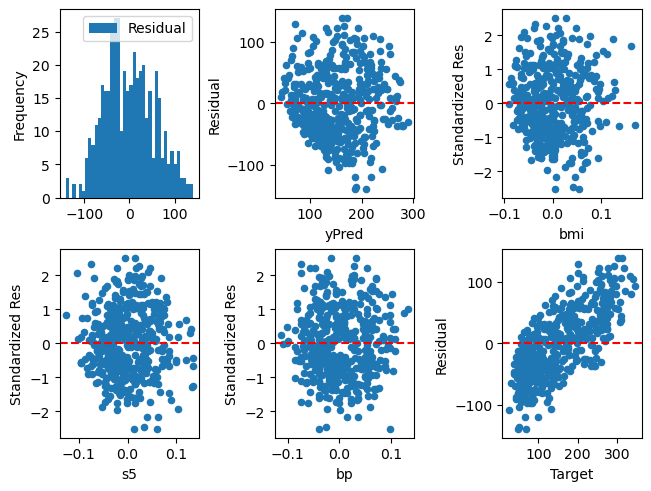

In [25]:
fig, ((hist1, resY, sresBmi), (sresS5, sresBp, resTarget)) = plt.subplots(2, 3, layout="constrained")
DiaB.plot(y="Residual", kind = "hist", bins=40, ax=hist1)
DiaB.plot("yPred", "Residual", kind="scatter", ax=resY)
resY.axhline(y=0.0, c="red", linestyle="dashed")
DiaB.plot("bmi", "Standardized Res", kind="scatter", ax=sresBmi)
sresBmi.axhline(y=0.0, c="red", linestyle="dashed")
DiaB.plot("s5", "Standardized Res", kind="scatter", ax=sresS5)
sresS5.axhline(y=0.0, c="red", linestyle="dashed")
DiaB.plot("bp", "Standardized Res", kind="scatter", ax=sresBp)
sresBp.axhline(y=0.0, c="red", linestyle="dashed")
DiaB.plot("Target", "Residual", kind="scatter", ax=resTarget)
resTarget.axhline(y=0.0, c="red", linestyle="dashed")
plt.show()

From our home-grown residual plots we can see that we have an almost perfect normal distribution here in the first plot. So here we have nothing to complain about.
The residuals are well distributed along the axis of all the independent variables. But we discover two things.<br>
For example that Y_pred has a small tendency to be homoscedastic in most of the graphs. And this means that it grows with the size of the variables.<br>
We can also see that the target variable Y and the residuals of the model diverge along the target axis.<br>
These are things that you would never have discovered if you have used only the standard printouts of residuals from the package. In practice this, despite that all the other measures declares the model to be good or perfect, means that there is a lot of room for improving this model and that the model doesn't fully capture the structure of our data.<br>
So what we can say from these residual plots is that we have not managed to model this problem perfectly, there are structures which we have failed to model and we can make a better model.<br>
We have a perfect normal distribution, which is great. We have some small deviations, but we could say that most of these small deviations are perfectly acceptable for a dataset of this size. We can say that residuals are well distributed along the axis of all independent variables,nd they also look very random.